## Importing the required libraries

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\niran\Anaconda3\envs\may\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.


In [3]:
import os

In [4]:
mylist= os.listdir('../../Resources/data/AudioFile')

In [5]:
type(mylist)

list

In [6]:
print(mylist[18])

03-01-01-01-01-01-19.wav


In [7]:
print(mylist[400][6:-16])

03


## Plotting the audio file's waveform and its spectrogram

In [8]:
data, sampling_rate = librosa.load('../../Resources/data/AudioFile/03-01-06-02-02-01-15.wav')

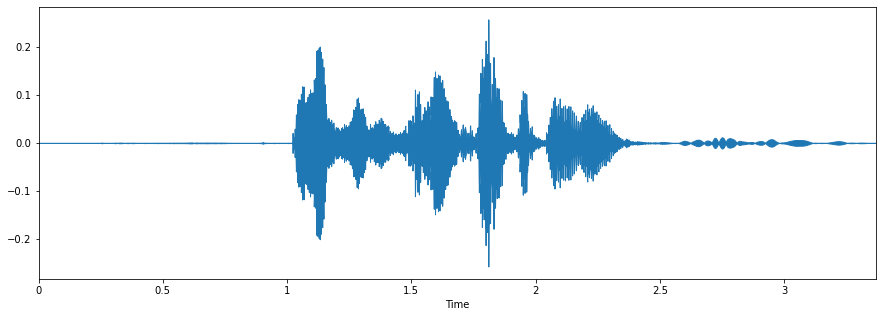

In [9]:
# % pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

## Setting the labels

In [10]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')

In [11]:
labels = pd.DataFrame(feeling_list)

In [12]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


## Getting the features of audio files using librosa

In [13]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('../../Resources/data/AudioFile/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [14]:
df[:5]

,feature
0,"[-70.26908, -70.26908, -70.26908, -70.26908, -..."
1,"[-65.707954, -65.707954, -63.58061, -61.41941,..."
2,"[-65.48336, -65.48336, -65.48336, -65.48336, -..."
3,"[-64.52947, -64.52947, -64.52947, -64.52947, -..."
4,"[-61.001263, -58.799526, -60.93121, -67.416855..."


In [15]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [16]:
newdf = pd.concat([df3,labels], axis=1)

In [17]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [18]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,...,-57.606026,-59.165623,-58.309124,-56.908752,-59.104012,-62.528481,-62.309921,-61.065742,-60.911045,male_calm
1,-65.707954,-65.707954,-63.580608,-61.419411,-59.960712,-63.011276,-63.900513,-56.068394,-54.799675,-54.788815,...,-39.834072,-40.705566,-41.277607,-41.391945,-43.967670,-49.544460,-50.657040,-49.280472,-48.760681,female_calm
2,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,-65.483360,...,-31.934776,-34.849857,-36.426250,-36.479450,-37.743347,-40.266872,-41.793125,-41.500591,-40.949795,male_calm
3,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-64.529472,-65.920654,...,-48.780212,-48.577007,-47.649605,-42.966824,-42.567753,-43.183723,-44.057907,-43.637939,-44.574593,female_calm
4,-61.001263,-58.799526,-60.931210,-67.416855,-72.383270,-64.842598,-61.867981,-64.517372,-60.647495,-58.380913,...,-39.386536,-42.110699,-41.020592,-38.441113,-36.532555,-37.991196,-40.078472,-43.429203,-43.876236,male_calm


In [19]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
848,-79.435638,-79.435638,-78.686943,-71.375862,-67.122002,-68.116364,-74.360542,-69.576897,-69.593620,-77.246216,...,-59.928574,-57.491684,-58.985573,-64.209747,-61.663204,-58.318909,-57.961082,-58.964241,-59.840477,male_fearful
419,-53.846745,-55.077541,-53.213943,-51.161003,-52.952957,-52.184334,-53.711166,-54.610836,-53.040466,-52.105446,...,-48.541813,-47.603245,-46.504757,-47.173546,-48.046284,-49.019577,-50.901035,-51.013924,-49.100830,female_sad
119,-66.118599,-66.118599,-66.118599,-66.118599,-66.118599,-66.118599,-66.118599,-66.118599,-66.118599,-66.118599,...,-44.112911,-42.837837,-44.003872,-45.647476,-44.321590,-43.452980,-43.615913,-38.091393,-32.151810,female_calm
741,-47.361263,-47.380356,-47.380356,-47.399944,-47.442410,-47.358257,-47.269058,-47.364361,-47.500504,-47.412178,...,-32.110233,-33.327957,-34.514805,-34.207066,-33.304726,-31.966728,-31.356388,-20.281324,-13.181356,female_angry
441,-55.828598,-54.927223,-55.899063,-54.731400,-54.648117,-54.109776,-51.159790,-52.668129,-54.077656,-52.973198,...,-49.920723,-47.436123,-46.915627,-48.195213,-49.986801,-50.084087,-52.191463,-53.971855,-53.709595,female_sad
470,-36.126728,-37.925468,-44.676418,-44.408535,-45.143883,-46.200142,-46.784981,-48.610306,-48.341511,-47.609085,...,-47.586033,-45.349567,-45.404732,-46.597786,-45.618145,-47.008972,-47.374065,-47.736271,-48.120403,male_sad
695,-44.502144,-44.502144,-44.502144,-44.502144,-44.502144,-44.502144,-44.502144,-44.502144,-44.502144,-44.502144,...,-29.404114,-30.510338,-33.666458,-34.622902,-34.255554,-34.659317,-36.206184,-14.178889,-6.240913,female_angry
430,-66.134102,-66.134102,-66.134102,-66.134102,-64.129135,-64.604721,-66.134102,-66.134102,-66.134102,-66.134102,...,-39.269119,-41.032089,-44.079765,-46.428951,-45.710022,-45.489117,-48.365913,-48.693192,-49.968472,male_sad
691,-41.355442,-41.410957,-42.389957,-42.051632,-41.906570,-43.455910,-43.266167,-44.424095,-44.371040,-42.989670,...,-29.448526,-28.893654,-28.805887,-28.799578,-32.017281,-34.166515,-32.210762,-26.593798,-22.249102,female_angry
414,-52.611351,-54.193245,-55.792133,-54.260006,-52.850620,-52.462875,-56.099991,-55.851360,-53.044067,-52.092690,...,-52.436104,-49.173382,-50.586445,-52.753426,-53.797512,-54.839138,-54.712898,-55.000065,-61.607857,male_sad


In [20]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [21]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [22]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
816,-60.113277,-61.480373,-62.337132,-62.337132,-62.337132,-62.099205,-62.337132,-62.337132,-62.337132,-62.337132,...,-61.349625,-61.982887,-59.662254,-60.827881,-62.069481,-62.337132,-62.319901,-58.939781,-60.151546,male_fearful
520,-53.265671,-53.873226,-53.571774,-54.281437,-54.985538,-51.726456,-49.456474,-48.631340,-48.471985,-49.238091,...,-41.622597,-42.108971,-40.963406,-38.895622,-38.272129,-38.398685,-39.295212,-39.509701,-33.066578,male_sad
828,-57.103317,-58.846394,-62.483608,-60.748840,-57.373867,-56.759415,-55.434879,-54.679077,-56.113235,-57.170918,...,-56.112251,-56.136909,-57.315056,-59.008846,-59.973488,-58.183811,-56.690311,-56.731438,-58.309311,male_fearful
192,-63.797665,-63.797665,-63.797665,-63.797665,-63.797665,-59.036747,-57.874493,-61.433617,-63.797665,-63.797665,...,-62.349586,-59.253220,-60.011063,-58.259274,-59.059578,-63.660530,-63.819454,-63.866131,-62.618755,male_happy
18,-54.916752,-53.507561,-53.439835,-54.011238,-54.143227,-53.406937,-54.146221,-53.641865,-53.747654,-52.604374,...,-49.080509,-49.629562,-55.179153,-59.767414,-57.050034,-55.839741,-55.907513,-57.098518,-56.193832,male_calm
482,-54.437271,-54.320618,-54.417931,-54.531578,-53.982185,-53.191643,-53.615845,-53.894936,-53.894936,-53.912369,...,-44.167282,-45.208656,-47.425510,-48.709202,-48.069168,-46.475285,-45.687840,-48.411385,-49.075588,male_sad
821,-62.690250,-60.901104,-60.310390,-60.257004,-61.249214,-63.841129,-60.683586,-60.608040,-62.260258,-61.724197,...,-58.165695,-61.075905,-60.047195,-57.097397,-55.411484,-56.119907,-60.323399,-63.528954,-59.453232,female_fearful
676,-43.104778,-43.104778,-43.104778,-43.104778,-43.104778,-43.104778,-42.748131,-42.931320,-43.104778,-43.104778,...,-43.085606,-43.104778,-43.104778,-43.104778,-43.104778,-42.891567,-43.104778,-43.104778,-43.104778,male_angry
180,-67.782623,-67.646133,-67.782623,-67.782623,-67.665245,-66.754837,-67.782623,-67.743919,-61.295418,-57.663574,...,-59.778748,-59.529095,-56.865257,-56.516727,-58.672173,-62.704830,-57.393917,-57.419025,-59.819069,male_calm
371,-47.335747,-47.880394,-47.564209,-47.440208,-48.164780,-48.736382,-48.969528,-48.073845,-46.957420,-46.738323,...,-34.162621,-33.885574,-33.927269,-36.003525,-36.588448,-36.450668,-37.397915,-33.739315,-28.100016,female_happy


In [23]:
trainfeatures = train.iloc[:, :-1]

In [24]:
trainlabel = train.iloc[:, -1:]

In [25]:
testfeatures = test.iloc[:, :-1]

In [26]:
testlabel = test.iloc[:, -1:]

In [27]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


C:\Users\niran\Anaconda3\envs\may\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
X_train.shape

(785, 216)

## Changing dimension for CNN model

In [30]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [31]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [33]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [34]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Train on 785 samples, validate on 175 samples
Epoch 1/700
785/785 [==============================] - 2s 3ms/step - loss: 2.3689 - accuracy: 0.1019 - val_loss: 2.2601 - val_accuracy: 0.1543
Epoch 2/700
785/785 [==============================] - 2s 3ms/step - loss: 2.2397 - accuracy: 0.1605 - val_loss: 2.2596 - val_accuracy: 0.1029
Epoch 3/700
785/785 [==============================] - 2s 3ms/step - loss: 2.2164 - accuracy: 0.1376 - val_loss: 2.2147 - val_accuracy: 0.1657
Epoch 4/700
785/785 [==============================] - 2s 3ms/step - loss: 2.1879 - accuracy: 0.1694 - val_loss: 2.1849 - val_accuracy: 0.1657
Epoch 5/700
785/785 [==============================] - 2s 3ms/step - loss: 2.1702 - accuracy: 0.1834 - val_loss: 2.1686 - val_accuracy: 0.1657
Epoch 6/700
785/785 [==============================] - 2s 3ms/step - loss: 2.1505 - accuracy: 0.1949 - val_loss: 2.1964 - val_accuracy: 0.1086
Epoch 7/700
785/785 [==============================] - 2s 3ms/step - loss: 2.1298 - accuracy: 0.

785/785 [==============================] - 2s 3ms/step - loss: 1.6254 - accuracy: 0.4076 - val_loss: 1.6891 - val_accuracy: 0.3886
Epoch 58/700
785/785 [==============================] - 2s 3ms/step - loss: 1.6091 - accuracy: 0.3911 - val_loss: 1.7103 - val_accuracy: 0.3771
Epoch 59/700
785/785 [==============================] - 2s 3ms/step - loss: 1.6103 - accuracy: 0.4000 - val_loss: 1.6793 - val_accuracy: 0.3714
Epoch 60/700
785/785 [==============================] - 2s 3ms/step - loss: 1.5938 - accuracy: 0.4076 - val_loss: 1.6688 - val_accuracy: 0.3886
Epoch 61/700
785/785 [==============================] - 2s 3ms/step - loss: 1.5955 - accuracy: 0.3987 - val_loss: 1.6816 - val_accuracy: 0.3943
Epoch 62/700
785/785 [==============================] - 2s 3ms/step - loss: 1.5804 - accuracy: 0.4127 - val_loss: 1.6696 - val_accuracy: 0.4229
Epoch 63/700
785/785 [==============================] - 3s 3ms/step - loss: 1.5892 - accuracy: 0.3975 - val_loss: 1.6678 - val_accuracy: 0.3886
Epoch

785/785 [==============================] - 3s 3ms/step - loss: 1.3367 - accuracy: 0.5045 - val_loss: 1.4686 - val_accuracy: 0.4514
Epoch 114/700
785/785 [==============================] - 2s 3ms/step - loss: 1.3284 - accuracy: 0.5172 - val_loss: 1.5257 - val_accuracy: 0.4229
Epoch 115/700
785/785 [==============================] - 3s 3ms/step - loss: 1.3246 - accuracy: 0.5096 - val_loss: 1.5310 - val_accuracy: 0.4229
Epoch 116/700
785/785 [==============================] - 2s 3ms/step - loss: 1.3171 - accuracy: 0.5159 - val_loss: 1.8376 - val_accuracy: 0.3143
Epoch 117/700
785/785 [==============================] - 2s 3ms/step - loss: 1.3296 - accuracy: 0.5096 - val_loss: 1.5476 - val_accuracy: 0.3886
Epoch 118/700
785/785 [==============================] - 3s 3ms/step - loss: 1.3302 - accuracy: 0.5019 - val_loss: 1.4649 - val_accuracy: 0.4743
Epoch 119/700
785/785 [==============================] - 2s 3ms/step - loss: 1.3179 - accuracy: 0.5057 - val_loss: 1.5894 - val_accuracy: 0.4171

785/785 [==============================] - 2s 3ms/step - loss: 1.1814 - accuracy: 0.5631 - val_loss: 1.5011 - val_accuracy: 0.4114
Epoch 170/700
785/785 [==============================] - 2s 3ms/step - loss: 1.1784 - accuracy: 0.5707 - val_loss: 1.4222 - val_accuracy: 0.4971
Epoch 171/700
785/785 [==============================] - 2s 3ms/step - loss: 1.1789 - accuracy: 0.5720 - val_loss: 1.6290 - val_accuracy: 0.4286
Epoch 172/700
785/785 [==============================] - 3s 3ms/step - loss: 1.1945 - accuracy: 0.5631 - val_loss: 1.5047 - val_accuracy: 0.4457
Epoch 173/700
785/785 [==============================] - 2s 3ms/step - loss: 1.1758 - accuracy: 0.5885 - val_loss: 1.4135 - val_accuracy: 0.4457
Epoch 174/700
785/785 [==============================] - 3s 3ms/step - loss: 1.1699 - accuracy: 0.5643 - val_loss: 1.4857 - val_accuracy: 0.4571
Epoch 175/700
785/785 [==============================] - 2s 3ms/step - loss: 1.1726 - accuracy: 0.5694 - val_loss: 1.5058 - val_accuracy: 0.4229

785/785 [==============================] - 2s 3ms/step - loss: 1.0657 - accuracy: 0.6331 - val_loss: 1.4991 - val_accuracy: 0.4286
Epoch 226/700
785/785 [==============================] - 2s 3ms/step - loss: 1.0711 - accuracy: 0.6153 - val_loss: 1.3947 - val_accuracy: 0.5257
Epoch 227/700
785/785 [==============================] - 2s 3ms/step - loss: 1.0570 - accuracy: 0.6127 - val_loss: 1.4703 - val_accuracy: 0.4971
Epoch 228/700
785/785 [==============================] - 2s 3ms/step - loss: 1.0677 - accuracy: 0.6191 - val_loss: 1.3331 - val_accuracy: 0.4914
Epoch 229/700
785/785 [==============================] - 3s 3ms/step - loss: 1.0573 - accuracy: 0.6268 - val_loss: 1.3785 - val_accuracy: 0.5143
Epoch 230/700
785/785 [==============================] - 2s 3ms/step - loss: 1.0623 - accuracy: 0.6268 - val_loss: 1.5939 - val_accuracy: 0.4400
Epoch 231/700
785/785 [==============================] - 2s 3ms/step - loss: 1.0681 - accuracy: 0.6115 - val_loss: 1.3910 - val_accuracy: 0.4914

785/785 [==============================] - 3s 3ms/step - loss: 0.9786 - accuracy: 0.6586 - val_loss: 1.3934 - val_accuracy: 0.4914
Epoch 282/700
785/785 [==============================] - 3s 3ms/step - loss: 0.9682 - accuracy: 0.6611 - val_loss: 1.4167 - val_accuracy: 0.4629
Epoch 283/700
785/785 [==============================] - 2s 3ms/step - loss: 0.9646 - accuracy: 0.6752 - val_loss: 1.4048 - val_accuracy: 0.4857
Epoch 284/700
785/785 [==============================] - 2s 3ms/step - loss: 0.9716 - accuracy: 0.6471 - val_loss: 1.3826 - val_accuracy: 0.4857
Epoch 285/700
785/785 [==============================] - 2s 3ms/step - loss: 0.9568 - accuracy: 0.6688 - val_loss: 1.4778 - val_accuracy: 0.4514
Epoch 286/700
785/785 [==============================] - 3s 3ms/step - loss: 0.9674 - accuracy: 0.6701 - val_loss: 1.4279 - val_accuracy: 0.4857
Epoch 287/700
785/785 [==============================] - 3s 3ms/step - loss: 0.9603 - accuracy: 0.6561 - val_loss: 1.3848 - val_accuracy: 0.5029

785/785 [==============================] - 3s 3ms/step - loss: 0.8749 - accuracy: 0.7006 - val_loss: 1.3531 - val_accuracy: 0.5029
Epoch 338/700
785/785 [==============================] - 3s 3ms/step - loss: 0.8762 - accuracy: 0.7057 - val_loss: 1.4614 - val_accuracy: 0.4629
Epoch 339/700
785/785 [==============================] - 2s 3ms/step - loss: 0.8656 - accuracy: 0.7108 - val_loss: 1.4470 - val_accuracy: 0.5257
Epoch 340/700
785/785 [==============================] - 3s 3ms/step - loss: 0.8640 - accuracy: 0.7121 - val_loss: 1.3714 - val_accuracy: 0.5143
Epoch 341/700
785/785 [==============================] - 2s 3ms/step - loss: 0.8705 - accuracy: 0.6981 - val_loss: 1.3731 - val_accuracy: 0.5029
Epoch 342/700
785/785 [==============================] - 2s 3ms/step - loss: 0.8626 - accuracy: 0.7019 - val_loss: 1.3528 - val_accuracy: 0.5143
Epoch 343/700
785/785 [==============================] - 3s 3ms/step - loss: 0.8609 - accuracy: 0.7057 - val_loss: 1.4877 - val_accuracy: 0.4743

785/785 [==============================] - 3s 4ms/step - loss: 0.7779 - accuracy: 0.7389 - val_loss: 1.4609 - val_accuracy: 0.4971
Epoch 394/700
785/785 [==============================] - 3s 4ms/step - loss: 0.7707 - accuracy: 0.7490 - val_loss: 1.4155 - val_accuracy: 0.5200
Epoch 395/700
785/785 [==============================] - 3s 4ms/step - loss: 0.7701 - accuracy: 0.7439 - val_loss: 1.3608 - val_accuracy: 0.5486
Epoch 396/700
785/785 [==============================] - 3s 4ms/step - loss: 0.7621 - accuracy: 0.7490 - val_loss: 1.4918 - val_accuracy: 0.4857
Epoch 397/700
785/785 [==============================] - 3s 4ms/step - loss: 0.7632 - accuracy: 0.7516 - val_loss: 1.4545 - val_accuracy: 0.4971
Epoch 398/700
785/785 [==============================] - 3s 4ms/step - loss: 0.7691 - accuracy: 0.7567 - val_loss: 1.3901 - val_accuracy: 0.5200
Epoch 399/700
785/785 [==============================] - 3s 4ms/step - loss: 0.7551 - accuracy: 0.7554 - val_loss: 1.4994 - val_accuracy: 0.4686

785/785 [==============================] - 3s 4ms/step - loss: 0.6868 - accuracy: 0.7669 - val_loss: 1.3849 - val_accuracy: 0.5143
Epoch 450/700
785/785 [==============================] - 3s 4ms/step - loss: 0.6710 - accuracy: 0.7936 - val_loss: 1.6346 - val_accuracy: 0.4343
Epoch 451/700
785/785 [==============================] - 3s 4ms/step - loss: 0.6743 - accuracy: 0.7834 - val_loss: 1.4371 - val_accuracy: 0.5086
Epoch 452/700
785/785 [==============================] - 3s 4ms/step - loss: 0.6749 - accuracy: 0.7847 - val_loss: 1.4249 - val_accuracy: 0.4971
Epoch 453/700
785/785 [==============================] - 3s 4ms/step - loss: 0.6801 - accuracy: 0.7834 - val_loss: 1.5614 - val_accuracy: 0.4971
Epoch 454/700
785/785 [==============================] - 3s 4ms/step - loss: 0.6733 - accuracy: 0.7847 - val_loss: 1.4140 - val_accuracy: 0.4800
Epoch 455/700
785/785 [==============================] - 3s 4ms/step - loss: 0.6677 - accuracy: 0.7962 - val_loss: 1.6914 - val_accuracy: 0.4400

785/785 [==============================] - 3s 4ms/step - loss: 0.5853 - accuracy: 0.8217 - val_loss: 1.3873 - val_accuracy: 0.5486
Epoch 506/700
785/785 [==============================] - 3s 4ms/step - loss: 0.5924 - accuracy: 0.8204 - val_loss: 1.5972 - val_accuracy: 0.5143
Epoch 507/700
785/785 [==============================] - 3s 4ms/step - loss: 0.5854 - accuracy: 0.8166 - val_loss: 1.4123 - val_accuracy: 0.4971
Epoch 508/700
785/785 [==============================] - 3s 4ms/step - loss: 0.5859 - accuracy: 0.8255 - val_loss: 1.5657 - val_accuracy: 0.4743
Epoch 509/700
785/785 [==============================] - 3s 4ms/step - loss: 0.5825 - accuracy: 0.8293 - val_loss: 1.6315 - val_accuracy: 0.4686
Epoch 510/700
785/785 [==============================] - 3s 4ms/step - loss: 0.5771 - accuracy: 0.8280 - val_loss: 1.5403 - val_accuracy: 0.5029
Epoch 511/700
785/785 [==============================] - 3s 4ms/step - loss: 0.5785 - accuracy: 0.8242 - val_loss: 1.6725 - val_accuracy: 0.4743

785/785 [==============================] - 3s 4ms/step - loss: 0.5031 - accuracy: 0.8637 - val_loss: 1.4774 - val_accuracy: 0.5086
Epoch 562/700
785/785 [==============================] - 3s 3ms/step - loss: 0.4941 - accuracy: 0.8548 - val_loss: 1.4203 - val_accuracy: 0.5371
Epoch 563/700
785/785 [==============================] - 3s 3ms/step - loss: 0.4995 - accuracy: 0.8561 - val_loss: 1.4347 - val_accuracy: 0.5371
Epoch 564/700
785/785 [==============================] - 3s 3ms/step - loss: 0.4873 - accuracy: 0.8611 - val_loss: 1.4823 - val_accuracy: 0.5029
Epoch 565/700
785/785 [==============================] - 2s 3ms/step - loss: 0.4911 - accuracy: 0.8573 - val_loss: 1.6110 - val_accuracy: 0.5029
Epoch 566/700
785/785 [==============================] - 2s 3ms/step - loss: 0.4999 - accuracy: 0.8446 - val_loss: 1.5680 - val_accuracy: 0.5029
Epoch 567/700
785/785 [==============================] - 3s 4ms/step - loss: 0.4852 - accuracy: 0.8497 - val_loss: 1.5084 - val_accuracy: 0.5029

785/785 [==============================] - 3s 4ms/step - loss: 0.4173 - accuracy: 0.8854 - val_loss: 1.6233 - val_accuracy: 0.4914
Epoch 618/700
785/785 [==============================] - 3s 4ms/step - loss: 0.4115 - accuracy: 0.8841 - val_loss: 1.4579 - val_accuracy: 0.5371
Epoch 619/700
785/785 [==============================] - 3s 4ms/step - loss: 0.4144 - accuracy: 0.8930 - val_loss: 1.4620 - val_accuracy: 0.5200
Epoch 620/700
785/785 [==============================] - 3s 4ms/step - loss: 0.4130 - accuracy: 0.8803 - val_loss: 1.6008 - val_accuracy: 0.4857
Epoch 621/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3949 - accuracy: 0.8892 - val_loss: 1.5866 - val_accuracy: 0.5086
Epoch 622/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3982 - accuracy: 0.8917 - val_loss: 1.6491 - val_accuracy: 0.4629
Epoch 623/700
785/785 [==============================] - 3s 4ms/step - loss: 0.4121 - accuracy: 0.8841 - val_loss: 1.7810 - val_accuracy: 0.4514

785/785 [==============================] - 3s 4ms/step - loss: 0.3297 - accuracy: 0.9121 - val_loss: 1.5432 - val_accuracy: 0.5086
Epoch 674/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3313 - accuracy: 0.9083 - val_loss: 1.6000 - val_accuracy: 0.5200
Epoch 675/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3278 - accuracy: 0.9210 - val_loss: 1.7195 - val_accuracy: 0.4914
Epoch 676/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3273 - accuracy: 0.9121 - val_loss: 1.5777 - val_accuracy: 0.5086
Epoch 677/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3304 - accuracy: 0.9032 - val_loss: 1.7237 - val_accuracy: 0.4514
Epoch 678/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3286 - accuracy: 0.9159 - val_loss: 1.5568 - val_accuracy: 0.5200
Epoch 679/700
785/785 [==============================] - 3s 4ms/step - loss: 0.3163 - accuracy: 0.9159 - val_loss: 1.7532 - val_accuracy: 0.4800

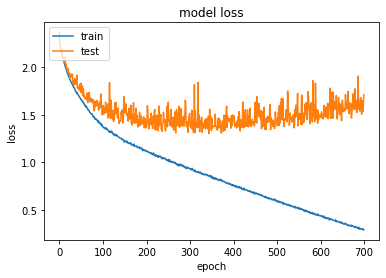

In [35]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [36]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\niran\OneDrive\Desktop\Project\Project_Final\Project-Final\static\py\saved_models\Emotion_Voice_Detection_Model.h5 


In [37]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [38]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 49.71%


## Predicting emotions on the test data

In [39]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

175/175 [==============================] - 0s 934us/step


In [40]:
preds

array([[3.3107059e-04, 7.5867534e-01, 1.6998310e-02, ..., 1.5355609e-02,
        2.9689772e-04, 1.4221893e-02],
       [4.9009908e-04, 9.0589738e-01, 2.8636234e-04, ..., 1.4310696e-06,
        6.1432490e-07, 6.2854810e-06],
       [7.2338857e-04, 9.3168737e-06, 1.9660776e-07, ..., 1.0811578e-01,
        4.4220723e-03, 8.5662496e-01],
       ...,
       [3.3178518e-03, 1.0396882e-03, 7.2984882e-02, ..., 8.7810174e-02,
        7.9355566e-03, 7.2589965e-04],
       [2.4480075e-01, 8.7389046e-05, 7.2740090e-01, ..., 2.6168616e-02,
        8.9067784e-05, 2.1553387e-04],
       [2.1930457e-04, 4.5302542e-04, 6.5915850e-03, ..., 3.1913483e-01,
        2.5421951e-02, 5.0191158e-01]], dtype=float32)

In [41]:
preds1=preds.argmax(axis=1)

In [42]:
preds1

array([1, 1, 9, 0, 3, 9, 3, 0, 9, 1, 2, 1, 1, 7, 2, 4, 9, 1, 9, 6, 3, 6,
       5, 8, 7, 5, 0, 5, 5, 1, 4, 5, 2, 3, 6, 8, 1, 4, 0, 6, 1, 3, 1, 5,
       9, 9, 1, 9, 0, 9, 7, 8, 1, 3, 0, 0, 5, 5, 1, 3, 9, 8, 1, 8, 7, 7,
       0, 5, 2, 0, 8, 5, 3, 0, 3, 3, 2, 3, 5, 5, 9, 9, 7, 4, 3, 3, 0, 5,
       5, 0, 1, 0, 3, 0, 8, 2, 1, 3, 3, 5, 1, 9, 5, 7, 8, 8, 2, 4, 1, 9,
       9, 8, 5, 1, 7, 7, 9, 1, 3, 0, 5, 3, 0, 7, 4, 7, 5, 9, 0, 4, 9, 6,
       2, 7, 7, 9, 0, 9, 7, 6, 7, 6, 0, 5, 9, 9, 5, 3, 3, 7, 2, 8, 8, 4,
       0, 2, 9, 1, 3, 5, 3, 3, 1, 3, 8, 0, 6, 3, 0, 7, 3, 3, 3, 2, 9],
      dtype=int64)

In [43]:
abc = preds1.astype(int).flatten()

In [44]:
predictions = (lb.inverse_transform((abc)))

In [45]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf

,predictedvalues
0,female_calm
1,female_calm
2,male_sad
3,female_angry
4,female_happy
...,...
170,female_happy
171,female_happy
172,female_happy
173,female_fearful


In [46]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [47]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf

,actualvalues
0,female_sad
1,female_calm
2,male_sad
3,female_angry
4,female_happy
...,...
170,female_happy
171,female_calm
172,female_angry
173,female_fearful


In [48]:
finaldf = actualdf.join(preddf)


## Actual v/s Predicted emotions

In [49]:
finaldf

,actualvalues,predictedvalues
0,female_sad,female_calm
1,female_calm,female_calm
2,male_sad,male_sad
3,female_angry,female_angry
4,female_happy,female_happy
...,...,...
170,female_happy,female_happy
171,female_calm,female_happy
172,female_angry,female_happy
173,female_fearful,female_fearful


In [50]:
comparison_column = np.where(finaldf["actualvalues"] == finaldf["predictedvalues"], True, False)

In [51]:
finaldf['equal']=comparison_column

In [52]:
finaldf=finaldf.groupby(['actualvalues','equal']).count()

In [53]:
finaldf_reset=finaldf.reset_index()

In [54]:
emotion=finaldf_reset.actualvalues.unique()
sum=[]
for i in range(0,len(emotion)):
    subset_df = finaldf_reset[finaldf_reset['actualvalues']==emotion[i]]
    sum.append((subset_df.predictedvalues/subset_df.predictedvalues.sum()*100).to_list())

In [55]:
from functools import reduce
percentage=reduce(lambda x,y: x+y,sum)
finaldf_reset['percentage']=percentage

In [56]:
finaldf_reset

,actualvalues,equal,predictedvalues,percentage
0,female_angry,False,10,47.619048
1,female_angry,True,11,52.380952
2,female_calm,False,4,26.666667
3,female_calm,True,11,73.333333
4,female_fearful,False,15,71.428571
5,female_fearful,True,6,28.571429
6,female_happy,False,4,21.052632
7,female_happy,True,15,78.947368
8,female_sad,False,16,76.190476
9,female_sad,True,5,23.809524


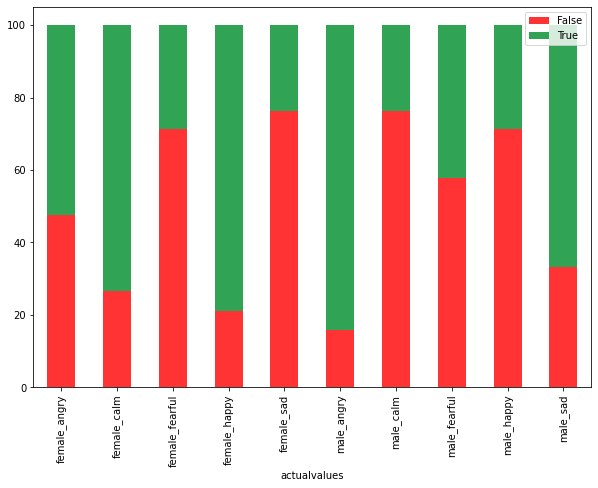

In [57]:
fig, ax = plt.subplots(figsize=(10,7))  

detected = finaldf_reset['equal'].drop_duplicates()
margin_bottom = np.zeros(len(finaldf_reset['actualvalues'].drop_duplicates()))
colors = ["#FF3333", "#31A354"]

for num, month in enumerate(detected):
    values = list(finaldf_reset[finaldf_reset['equal'] == month].loc[:, 'percentage'])

    finaldf_reset[finaldf_reset['equal'] == month].plot.bar(x='actualvalues',y='percentage', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

plt.show()

In [58]:
subset_df = finaldf_reset[finaldf_reset['actualvalues']=='male_sad']
print(subset_df.predictedvalues.sum())

12


In [59]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,2
female_calm,2
female_fearful,2
female_happy,2
female_sad,2
male_angry,2
male_calm,2
male_fearful,2
male_happy,2


In [60]:
finaldf.groupby('predictedvalues').count()

""
predictedvalues
2
3
4
5
6
8
10
11
15


In [61]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [65]:
data, sampling_rate = librosa.load('output10.wav')

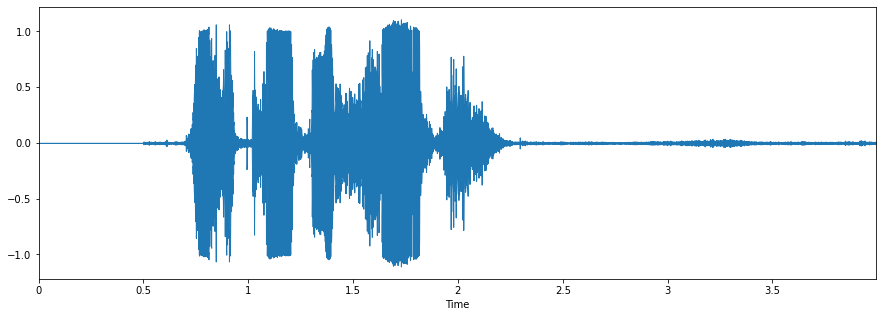

In [66]:
# % pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [107]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('AudioFile/03-02-05-01-01-01-07.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [108]:
livedf2= pd.DataFrame(data=livedf2)

In [109]:
livedf2 = livedf2.stack().to_frame().T

In [110]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-54.311943,-54.311943,-54.311943,-54.311943,-54.311943,-54.311943,-54.311943,-54.311943,-54.311943,-54.311943,...,-31.463947,-32.431175,-31.96899,-33.014484,-35.74715,-34.635471,-33.296459,-24.63722,-19.529123,-15.690511


In [111]:
twodim= np.expand_dims(livedf2, axis=2)

In [112]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 4ms/step


In [113]:
livepreds

array([[5.2869291e-06, 7.0907280e-10, 4.6659920e-10, 6.9979293e-13,
        1.0852528e-08, 9.7627568e-01, 9.5520569e-05, 1.0852168e-02,
        8.5640255e-05, 1.2685582e-02]], dtype=float32)

In [114]:
livepreds1=livepreds.argmax(axis=1)

In [115]:
liveabc = livepreds1.astype(int).flatten()

In [116]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_angry'], dtype=object)